# Analysis of HCP behavioral dataset

Rekha Varrier, main analyses Nov 2020 - Jan 2021.
- Some of the results were presented in an OHBM 2021 poster

Below are the steps to analyse the behavioral data of the HCP social task

In [2]:
#Importing data and packages, creating convenient variables
#%reset
import os
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline


folder = os.getcwd()
print('current dir: ',folder)
path = Path(folder)
parent_folder = path.parent
file_loc = os.path.join(parent_folder,'data')
print('data folder:',file_loc)
dataFile  = os.path.join(file_loc,'hcp_social_behav_for_ddm_stim-coding.csv')


current dir:  /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/BehaviorAnalyses/Documented scripts/code
data folder: /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/BehaviorAnalyses/Documented scripts/data


In [3]:
# setting default fontsizes for plots

s=16 # CHANGE FONTSIZE HERE

plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend
#import matplotlib as mpl
#mpl.rcParams['font.weight']= 'normal'


In [4]:
vid_names = {}
vid_names["run1"] = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical"]
vid_names["run2"] = ["Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]
vid_joined = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical","Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]

dat = pd.read_csv(dataFile)# , index_col = "subj_idx")
dat["run"] = ["run2" if x.split('.')[0] in vid_names["run1"] else "run1" for x in dat["movie"]]
dat["run"] = [0 if x.split('.')[0] in vid_names["run1"] else 1 for x in dat["movie"]]

print("n=",len(np.unique(dat["subj_idx"])))
dat.head(10)

n= 1051


,subj_idx,stim,movie,rt,response,run
0,168745,Mental,Scaring.AVI,1.252,1,1
1,168745,Mental,SEDUCING-B.AVI,0.578,1,1
2,168745,Random,STAR-A.AVI,1.643,0,1
3,168745,Mental,SURPRISING-B.AVI,1.082,1,1
4,168745,Random,TENNIS-A.AVI,1.232,0,1
5,668361,Mental,COAXING-B.AVI,1.796,9,0
6,668361,Random,BILLIARD-A.AVI,1.254,0,0
7,668361,Random,DRIFTING-A.AVI,0.590,0,0
8,668361,Mental,Fishing.AVI,0.993,0,0
9,668361,Random,Random mechanical.AVI,0.816,0,0


In [5]:
# exclude bad subjects (with <10 yes/no/unsure responses)

thresh = 10
trial_counts = dat.groupby("subj_idx").count()["rt"]
bad_subs = trial_counts[(trial_counts < thresh)].index
#print(bad_subs)
dat  = dat.reset_index() # add index as an additional column "index"
dat = dat.set_index('subj_idx') # make subj_idx the index
dat.drop(bad_subs, inplace=True) # remove bad subjects
dat = dat.reset_index() #bring back subj_idx as a column
dat = dat.set_index('index') # make the column "index" as the index (as in the beginning)

print("Nr. of subjects left",len(dat.groupby("subj_idx")))
print("Nr. of rows:",dat.shape)

Nr. of subjects left 826
Nr. of rows: (8260, 6)


In [6]:
#add accuracy as an additional column, remove impossible RTs

# add accuracy
acc = np.zeros((dat.shape[0],)) -1 # initialize accuracy with -1
acc[((dat['stim'] == 'Mental') & (dat['response'] == 1)) | ((dat['stim'] == 'Random') & (dat['response'] == 0))] = 1
acc[((dat['stim'] == 'Mental') & (dat['response'] == 0)) | ((dat['stim'] == 'Random') & (dat['response'] == 1))] = 0
acc[dat['response'] == 9] = 9
dat['accuracy'] = acc

# remove imppossible RTs
rtmin = 0.1 # threshold for impossibly short RTs
print('nrows before=',dat.shape[0])
dat= dat.loc[dat['rt']>=rtmin,:]
print('nrows after=',dat.shape[0])
#dat.head()


nrows before= 8260
nrows after= 8257


In [7]:
#Sort into sure and unsure trials dfs
data_sure = dat[dat["response"]!=9]
data_unsure = dat[dat["response"] ==9]
len(np.unique(data_sure['subj_idx']))

826

In [8]:
#red_rgb = [103,0,31] # edges of RdBu
#blue_rgb = [5,48,97] # edges of RdBu
red_rgb =[188,61,62] # from Emily
blue_rgb = [54,122,177] # from Emily
red_rgb = np.array(red_rgb)/255
blue_rgb = np.array(blue_rgb)/255
alpha = .2 # transparency inside boxplots, for datapts etc.

In [9]:
movies_list = list(dat['movie'].values)
movies_list[:5]

['Scaring.AVI',
 'SEDUCING-B.AVI',
 'STAR-A.AVI',
 'SURPRISING-B.AVI',
 'TENNIS-A.AVI']

In [10]:
dat['movies_ind']=[np.where(vid_joined==np.array(i[:-4]))[0][0] for i in movies_list]


,subj_idx,stim,movie,rt,response,run,accuracy,movies_ind
index,,,,,,,,
0,168745,Mental,Scaring.AVI,1.252,1,1,1.0,5
1,168745,Mental,SEDUCING-B.AVI,0.578,1,1,1.0,6
2,168745,Random,STAR-A.AVI,1.643,0,1,1.0,7
3,168745,Mental,SURPRISING-B.AVI,1.082,1,1,1.0,8
4,168745,Random,TENNIS-A.AVI,1.232,0,1,1.0,9
...,...,...,...,...,...,...,...,...
10144,175136,Mental,COAXING-B.AVI,1.542,1,0,1.0,0
10145,175136,Random,BILLIARD-A.AVI,0.893,0,0,1.0,1
10146,175136,Random,DRIFTING-A.AVI,0.895,0,0,1.0,2


In [11]:
total_counts =  dat.groupby(['movies_ind']).count()
total_counts

,subj_idx,stim,movie,rt,response,run,accuracy
movies_ind,,,,,,,
0,824,824,824,824,824,824,824
1,825,825,825,825,825,825,825
2,826,826,826,826,826,826,826
3,826,826,826,826,826,826,826
4,826,826,826,826,826,826,826
5,826,826,826,826,826,826,826
6,826,826,826,826,826,826,826
7,826,826,826,826,826,826,826
8,826,826,826,826,826,826,826


In [63]:
counts = dat.groupby(['movies_ind','response']).count().subj_idx.unstack(level=-1)
counts[np.isnan(counts)] = 0
counts['sum'] = counts[0]+counts[1]+counts[9]
#counts = counts.sort_values(by=['movies_ind','response'])
#counts = counts.append({'movies_ind':8,'response':0,'subj_idx':0},ignore_index=True)
counts['socialness'] = counts[1]/counts['sum']
counts =  counts.sort_values(by=['socialness'])
counts

response,0,1,9,sum,socialness
movies_ind,,,,,
2,782.0,6.0,38.0,826.0,0.007264
1,780.0,11.0,34.0,825.0,0.013333
7,761.0,20.0,45.0,826.0,0.024213
9,694.0,35.0,97.0,826.0,0.042373
4,564.0,86.0,176.0,826.0,0.104116
3,58.0,701.0,67.0,826.0,0.848668
5,24.0,783.0,19.0,826.0,0.947942
6,5.0,805.0,16.0,826.0,0.974576
0,7.0,811.0,6.0,824.0,0.984223


In [76]:
list(counts.index)

[2, 1, 7, 9, 4, 3, 5, 6, 0, 8]

In [79]:
vid_joined

['COAXING-B',
 'BILLIARD-A',
 'DRIFTING-A',
 'Fishing',
 'Random mechanical',
 'Scaring',
 'SEDUCING-B',
 'STAR-A',
 'SURPRISING-B',
 'TENNIS-A']

Text(0, 0.5, 'Movie')

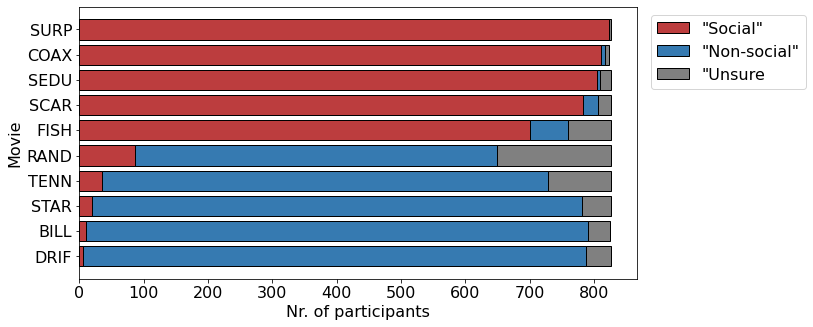

In [85]:
plt.figure(1,figsize=(10,5))
plt.barh(range(10),counts[1],color=red_rgb,label='"Social"',edgecolor='k')
plt.barh(range(10),counts[0],left=counts[1],edgecolor='k',color=blue_rgb,label='"Non-social"')
plt.barh(range(10),counts[9],left=counts[0]+counts[1],color='grey',edgecolor='k',label='"Unsure')

plt.legend(bbox_to_anchor=[1.01,1])
plt.yticks(range(10),[str.upper(vid_joined[i][:4]) for i in counts.index])
plt.xlabel('Nr. of participants')
plt.ylabel('Movie')

In [32]:
# another interesting variable - mean responses or mean socialness, but we don't need 
# this rn

plt.figure(1,figsize=(10,5))

resp_per_movie = dat.groupby(['movie','response']).count().response
print('resp_per_movie')
print(resp_per_movie)

movieNames_grouped = []
for i in range(len(resp_per_movie.index)):
    movieNames_grouped.append(resp_per_movie.index[i][1])
#print('movieNames_grouped:',movieNames_grouped)
lbl = [str.upper(i[0:5]) for i in movieNames_grouped] # first four letters of each movie name

socialness = resp_per_movie.values
nonsocialness = 1-socialness
plt.barh(range(10), socialness,color=red_rgb)
plt.barh(range(10), nonsocialness, left = socialness,color=blue_rgb)

#resp_per_movie.plot.bar(x ='', y ='', linestyle = 'None', alpha = 0.3)
plt.yticks(range(10),lbl, rotation = 30)
#plt.axvspan(-0.5,4.5, facecolor='0.2', alpha=0.2)
#plt.axvspan(4.5,10, facecolor='0.3', alpha=0.1)
#plt.xlim(-0.5,9.5)
plt.xlim(-.1,1.1)
#plt.ylabel("Movie name")
plt.title('Mean responses',fontsize = 20)
plt.xlabel('Mean response per movie \n(socialness)', fontsize = 20)

AttributeError: 'DataFrame' object has no attribute 'response'

<Figure size 720x360 with 0 Axes>

## Movie-wise trends - Accuracy per movie  and #unsure responses/movie


([<matplotlib.axis.XTick at 0x7ff60187e390>,
 [Text(0, 0, 'COAX'),
  Text(1, 0, 'FISH'),
  Text(2, 0, 'SEDU'),
  Text(3, 0, 'SURP'),
  Text(4, 0, 'SCAR'),
  Text(5, 0, 'BILL'),
  Text(6, 0, 'DRIF'),
  Text(7, 0, 'RAND'),
  Text(8, 0, 'STAR'),
  Text(9, 0, 'TENN')])

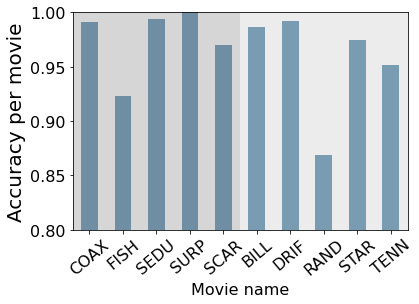

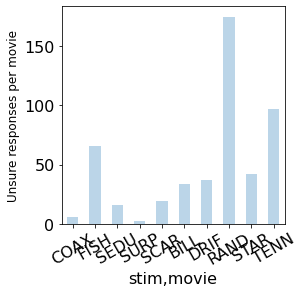

In [62]:
#Accuracy per movie (OHBM ABSTRACT FIG 2A)
acc_per_movie = data_sure.groupby(['stim','movie']).mean().accuracy
#print('acc_per_movie')
#print(acc_per_movie)

# (for the figure axlabels) creating groupwise movie name labels from the variable acc_per_movie
movieNames_grouped = []
for i in range(len(acc_per_movie.index)):
    movieNames_grouped.append(acc_per_movie.index[i][1])
#print('movieNames_grouped:',movieNames_grouped)
lbl = [str.upper(i[0:5]) for i in movieNames_grouped] # first four letters of each movie name

acc_per_movie.plot.bar(color = [0,0.3,0.5], alpha = 0.5)
plt.xlabel("Movie name")
plt.ylabel('Accuracy per movie', fontsize = 20)
lbl = [str.upper(i[0:4]) for i in movieNames_grouped] # first four letters of each movie name
plt.xticks(range(10),lbl, rotation = 40)
plt.axvspan(-0.5,4.5, facecolor='0.2', alpha=0.2) # background color for the first 5 bars(mental?)
plt.axvspan(4.5,10, facecolor='0.3', alpha=0.1) # bgcolor for the next 5 bars (random?)
plt.xlim(-0.5,9.5)
plt.ylim(0.8,1)

plt.figure(2)
#Unsure trials per movie
count_unsure_per_movie = data_unsure.groupby(['stim','movie']).size()
#print('count_unsure_per_movie')
#print(count_unsure_per_movie)

# Plot no. of uncertain responses per movie
count_unsure_per_movie.plot.bar(figsize = (4,4), x ='', y ='', linestyle = 'None', alpha = 0.3)
plt.ylabel('Unsure responses per movie', fontsize = 12)
plt.xticks(range(10),lbl, rotation = 30)

